In [2]:
import dateutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fr_raw = pd.read_csv(r'..\data\search\peak_finder\Final_Results.csv').dropna(axis=1, how='all')
fr_norm = pd.read_csv(r'..\data\processed\lipidomics_linregress_normalized_data.csv')
fr_filt = pd.read_csv(r'..\data\processed\lipidomics_normalized_filtered_data.csv', index_col=0)
file_grouping = pd.read_csv(r'..\data\metadata\file_grouping.csv', index_col=0)

fr_quant_filenames_in_analytical_order = file_grouping[file_grouping['quant_file'] == True]['fr_name'].to_list()

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]
bg_dict = {'diabetic': diabetic, 'impaired': impaired, 'normal': normal}
animal_to_tolerance_dict = {1076: 'diabetic', 1082: 'diabetic',1101: 'diabetic',
                            1060: 'impaired', 1062: 'impaired', 1074: 'impaired', 1092: 'impaired', 1102: 'impaired', 
                            1091: 'normal', 1093: 'normal',}

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

In [4]:
np.log2(fr_filt[fr_quant_filenames_in_analytical_order])

,20210729_AJ_Toh_RatBloodGlucose_T1076M_20210405_10wk_FBG.raw (F27),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210402_9wk_FBG.raw (F49),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),20210729_AJ_Toh_RatBloodGlucose_T1091M_20210410_10wk_FBG.raw (F39),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210406_9wk_RBG.raw (F44),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210413_10wk_RBG.raw (F52),20210729_AJ_Toh_RatBloodGlucose_T1082M_20210405_10wk_FBG.raw (F33),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55),...,20210729_AJ_Toh_RatBloodGlucose_T1092M_20210410_10wk_FBG.raw (F45),20210729_AJ_Toh_RatBloodGlucose_T1082M_20210325_8wk_RBG.raw (F30),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210325_8wk_RBG.raw (F10),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210410_10wk_FBG.raw (F63),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210330_8wk_RBG.raw (F48),20210729_AJ_Toh_RatBloodGlucose_T1074M_20210329_9wk_FBG.raw (F19),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210401_9wk_RBG.raw (F14),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210330_8wk_RBG.raw (F54),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210330_8wk_RBG.raw (F42),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210413_10wk_RBG.raw (F46)
Unique Identifier,,,,,,,,,,,,,,,,,,,,,
unknown_679.05463_0.536,20.405355,23.313111,23.218699,24.012349,24.302356,23.901455,23.883301,23.387975,24.421692,23.463756,...,22.462249,23.360916,22.399150,23.163419,22.737840,22.116533,23.352451,23.527438,23.858693,23.617549
unknown_641.1087_0.537,21.533648,24.586227,24.375151,25.685664,25.422294,24.936916,24.779941,24.696276,25.054941,24.934805,...,24.663849,23.700392,23.382317,24.385568,23.789670,22.248759,22.513249,24.558075,24.818525,24.575904
unknown_951.15973_0.541,20.665848,23.731244,23.038733,24.916555,24.042666,24.162971,23.627979,24.085858,23.169508,24.010849,...,23.452626,22.549975,23.249352,23.680978,23.989589,23.527507,24.002570,23.886203,24.069137,23.455789
unknown_329.03067_0.542,24.400930,26.811664,26.708762,25.977120,27.313654,27.337061,27.415597,27.230430,27.598719,27.126653,...,27.210668,26.194952,26.911119,26.805997,26.145097,26.638404,27.217392,26.970428,27.175265,26.482705
unknown_969.13147_0.544,19.378685,22.709669,21.722467,23.985839,22.321161,23.184906,22.795191,22.878785,22.397716,22.703282,...,22.602208,21.905509,22.226570,22.485669,22.208159,22.236114,23.151359,22.823820,21.750593,22.047030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
unknown_897.82532_20.148,18.897008,19.348489,21.529536,17.921098,20.133479,17.824376,18.836779,19.255315,18.261890,19.685160,...,18.604841,18.755897,18.996482,20.095162,17.759520,18.908638,18.093365,17.607114,17.326455,16.927718
unknown_974.9118_20.163,16.810111,17.364343,20.099612,18.430542,17.986741,18.099621,18.145468,14.496938,18.854601,18.324624,...,16.326408,19.046476,18.653201,18.635659,17.382575,17.575165,18.798950,16.704255,18.420810,17.646532
unknown_593.58716_20.175,17.724121,19.240306,21.430516,17.488155,19.996615,17.383197,18.282680,19.507853,17.718258,19.526233,...,18.815858,18.693961,18.778798,20.192346,17.113028,18.925197,17.773412,17.541022,16.974304,16.687194


Text(0.02, 0.5, 'log2 feature quant')

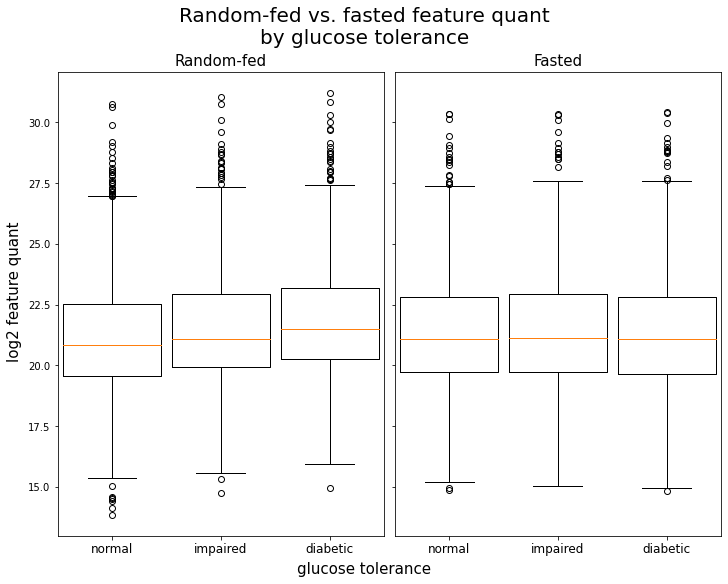

In [5]:
df = np.log2(fr_filt[fr_quant_filenames_in_analytical_order])

fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, constrained_layout=True)
fig.set_size_inches((10, 8))

for ax, bg_type in zip(axs, ['RBG', 'FBG']):
    for tol_type, position in zip(['normal', 'impaired', 'diabetic'], [1,2,3]):
        # Get filenames that match bg_type and tol_type
        cols = file_grouping[(file_grouping['bg_type'] == bg_type) & \
                             (file_grouping['glucose_tolerance'] == tol_type) & \
                             (file_grouping['quant_file'] == True)]['fr_name']
        ax.boxplot(df[cols].mean(axis=1), positions=[position, ], widths=0.9)
        
        # Option for barplots, much slower to render though
#         ax.bar(position, df[cols].mean(axis=1))
        
    ax.set_title('Random-fed' if bg_type == 'RBG' else 'Fasted', fontsize=15)
    ax.set_xticks([1,2,3], )
    ax.set_xticklabels(['normal', 'impaired', 'diabetic'], fontsize=12)

fig.suptitle('Random-fed vs. fasted feature quant\nby glucose tolerance', fontsize=20)
fig.supxlabel('glucose tolerance', fontsize=15)
fig.supylabel('log2 feature quant', fontsize=15)


In [6]:
bg_dict

{'diabetic': [1076, 1082, 1101],
 'impaired': [1060, 1062, 1074, 1092, 1102],
 'normal': [1091, 1093]}

Text(0.5, 0.98, 'Lipid Class and Glucose Tolerance\nRandom-fed vs. Fasted\nAverage of all 3 weeks')

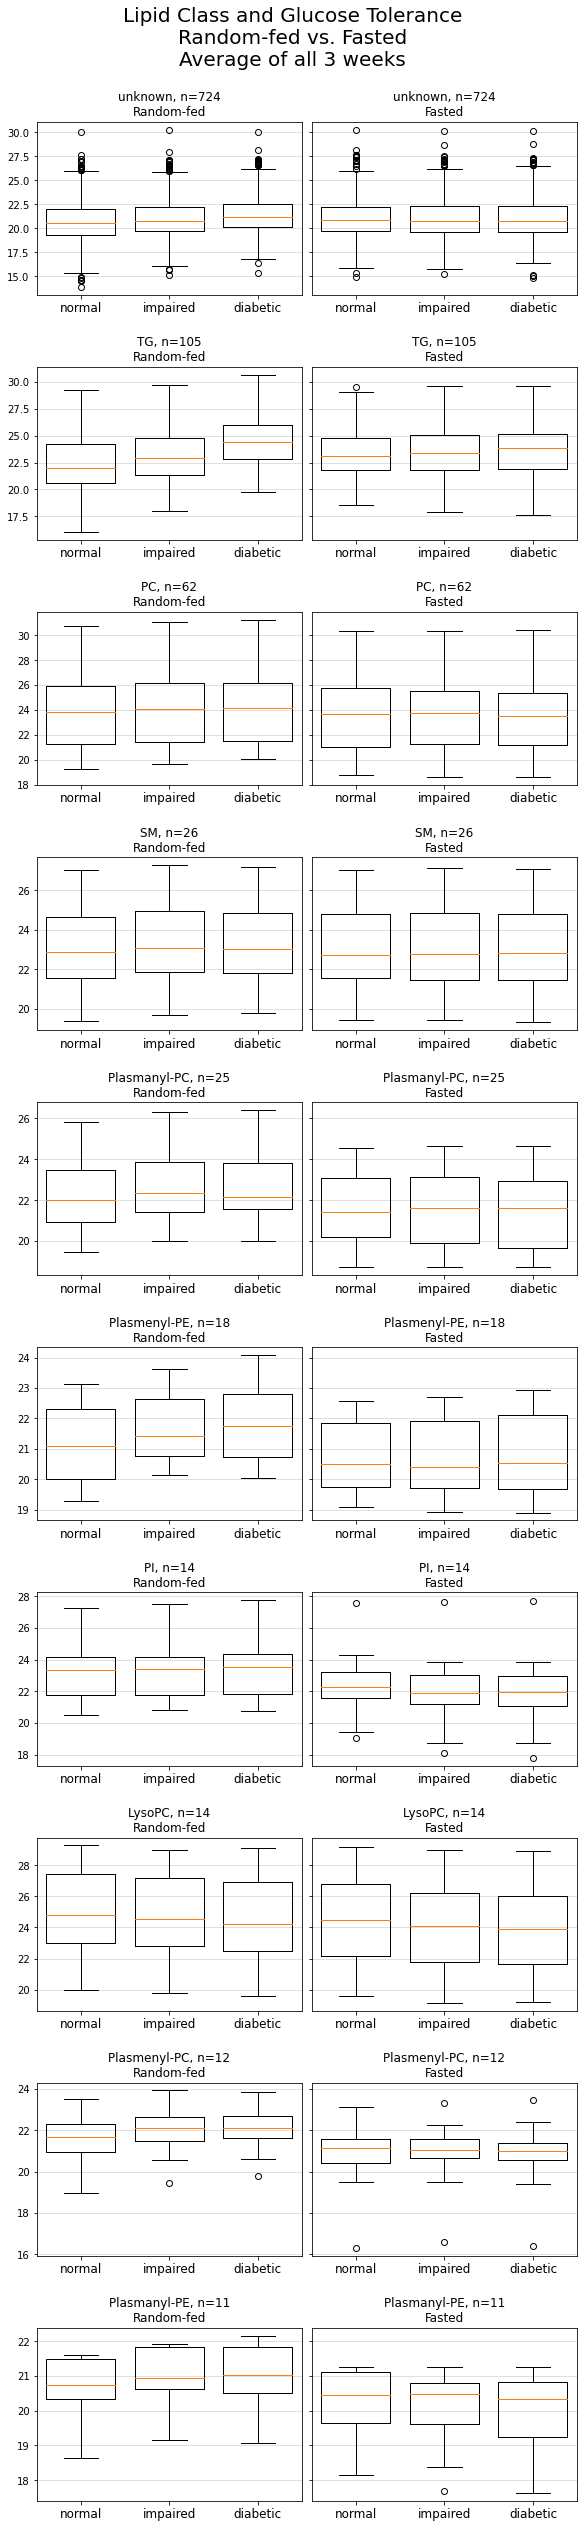

In [7]:
df = fr_filt

n_rats_per_gluc_tolerance = {'diabetic': 3, 'impaired': 5, 'normal': 2}

# 9 rows for each of 9 lipid classes that have # IDs > 10
# 3 cols for each glucose_tolerance 
fig, axs = plt.subplots(nrows=10, ncols=2, sharey='row', constrained_layout=True)
fig.set_size_inches((8, 35))
# plt.tight_layout()

lipid_classes = df['Lipid Class'].value_counts().iloc[0:10].to_dict()

for i, lipid_class in enumerate(lipid_classes):  # i = row index for axs
    for j, bg_type in enumerate(['RBG', 'FBG']):  # j = column index for axs
        
        # Get the fr_filenames from file_grouping['fr_name'] that match each iterator in each for loop
        # Then get the data from fr[fr_filenames]
        fr_filenames = file_grouping[(file_grouping['quant_file'] == True) & \
#                                      (file_grouping['glucose_tolerance'] == glucose_tolerance) & \
                                     (file_grouping['bg_type'] == bg_type)]['fr_name']
        
        df = fr_filt[fr_filt['Lipid Class'] == lipid_class][fr_filenames]
        norm_df = np.log2(df.filter(regex='1091|1093').mean(axis=1))
        impaired_df = np.log2(df.filter(regex='1060|1062|1074|1092|1102').mean(axis=1))
        diabetic_df = np.log2(df.filter(regex='1076|1082|1101').mean(axis=1))
#         display(norm_df)
#         display(impaired_df)
#         display(diabetic_df)
        
        ax = axs[i][j]
        
        ax.boxplot([norm_df, impaired_df, diabetic_df], widths=0.78)
        ax.grid(alpha=0.5, axis='y')
        ax_title = ('Random-fed' if bg_type == 'RBG' else 'Fasted')
        ax.set_title(f'\n{lipid_class}, n={lipid_classes[lipid_class]}'
                     f'\n{ax_title}')
        ax.set_xticklabels(['normal', 'impaired', 'diabetic'], fontsize=12)
        
fig.suptitle('Lipid Class and Glucose Tolerance\nRandom-fed vs. Fasted\nAverage of all 3 weeks', fontsize=20)
# plt.gcf()
# fig.supylabel('log2 feature quant', fontsize=20)  
    
# plt.savefig(r'..\reports\collaborator reports\preliminary 20210812\figures\lipid class feature quant comparison.png')           


In [8]:
lipid_classes = fr_filt['Lipid Class'].value_counts().iloc[1:11].to_dict()
lipid_classes

{'TG': 105,
 'PC': 62,
 'SM': 26,
 'Plasmanyl-PC': 25,
 'Plasmenyl-PE': 18,
 'PI': 14,
 'LysoPC': 14,
 'Plasmenyl-PC': 12,
 'Plasmanyl-PE': 11,
 'PE': 6}

AttributeError: 'numpy.ndarray' object has no attribute 'boxplot'

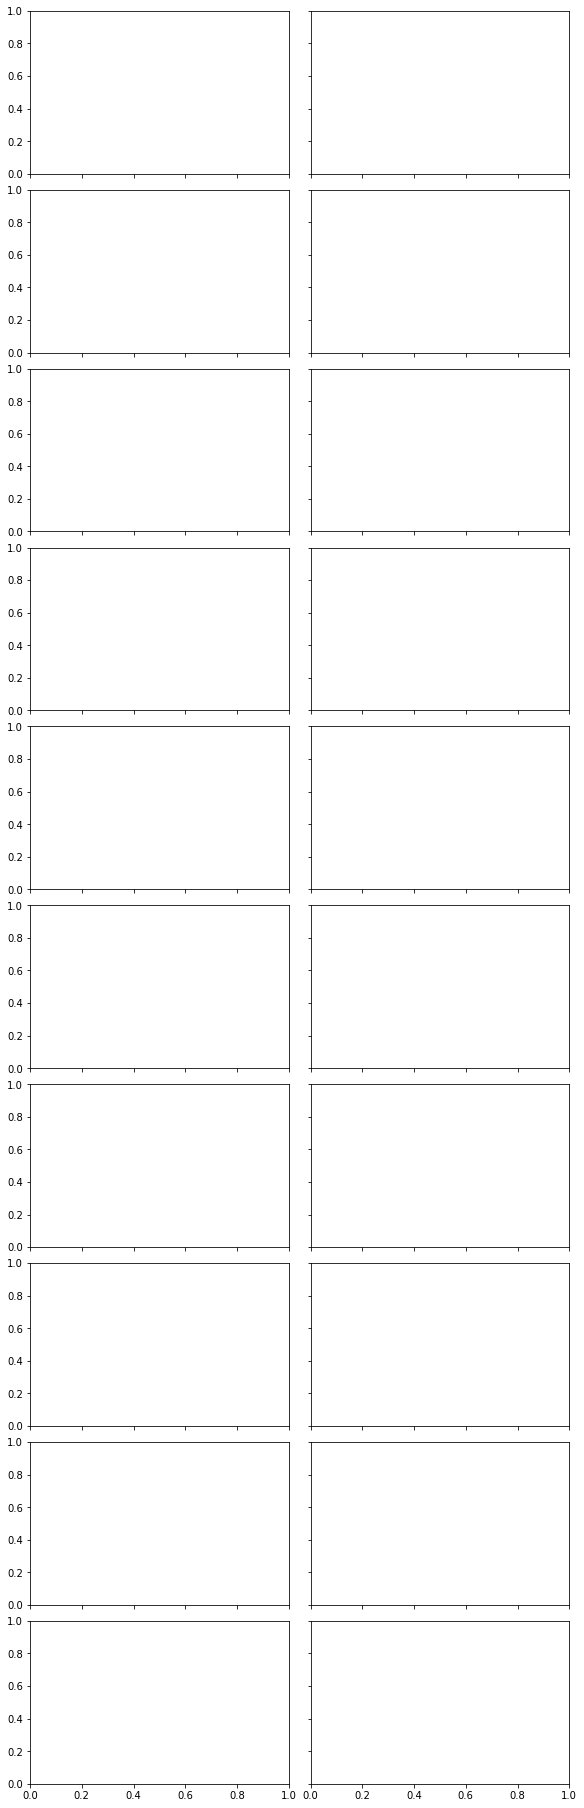

In [9]:
df = np.log2(fr_filt[fr_quant_filenames_in_analytical_order])

fig, axs = plt.subplots(nrows=10, ncols=2, sharey=True, sharex=True, constrained_layout=True)
fig.set_size_inches((8, 25))
for i, lipid_class in enumerate(lipid_classes):
    for ax, bg_type in zip(axs, ['RBG', 'FBG']):
        for tol_type, position in zip(['normal', 'impaired', 'diabetic'], [1,2,3]):
            # Get filenames that match bg_type and tol_type
            cols = file_grouping[(file_grouping['bg_type'] == bg_type) & \
                                 (file_grouping['glucose_tolerance'] == tol_type) & \
                                 (file_grouping['quant_file'] == True)]['fr_name']
            ax.boxplot(df[cols].mean(axis=1), positions=[position, ], widths=0.9)

            # Option for barplots, much slower to render though
    #         ax.bar(position, df[cols].mean(axis=1))

        ax.set_title('Random-fed' if bg_type == 'RBG' else 'Fasted', fontsize=15)
        ax.set_xticks([1,2,3], )
        ax.set_xticklabels(['normal', 'impaired', 'diabetic'], fontsize=12)

fig.suptitle('Random-fed vs. fasted feature quant\nby glucose tolerance', fontsize=20)
fig.supxlabel('glucose tolerance', fontsize=15)
fig.supylabel('log2 feature quant', fontsize=15)